In [15]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest 
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [18]:
data =yfinance.download(tickers= 'VOW3.DE, PAH3.DE, BMW.DE',interval ='1d',group_by='ticker',
                        auto_adjust= True, threads= True)

[*********************100%%**********************]  3 of 3 completed


In [19]:
df = data.copy()

key Dates

In [20]:
# Starting Date
start_date ='2009-04-05'
# First Official Announcement - 49.9%
ann_1 ='2009-12-09'
# Second Official Announcement - 51.1%
ann_2 ='2012-07-05'
#Ending Date
ann_1 = '2014-01-01'
# Dieselgate
d_gate ='2015-09-20'

Pre-processing the data

In [22]:
# Extracting Closing Prices
df['vol'] = df['VOW3.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close
# Creating Returns
df['ret_vol'] = df['VOW3.DE'].Close.pct_change(1).mul(100)
df['ret_por'] = df['PAH3.DE'].Close.pct_change(1).mul(100)
df['ret_bmw'] = df['BMW.DE'].Close.pct_change(1).mul(100)
# Creating Squared Returns
df['sq_vol'] = df['ret_vol'].mul(df['ret_vol'])
df['sq_por'] = df['ret_por'].mul(df['ret_por'])
df['sq_bmw'] = df['ret_bmw'].mul(df['ret_bmw'])
# Extracting Volume
df['q_vol'] = df['VOW3.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume

In [23]:
# Assigning the Frequency and Filling NA Values
df = df.asfreq('b')
df = df.fillna(method='bfill')

In [24]:
# Removing Surplus Data
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

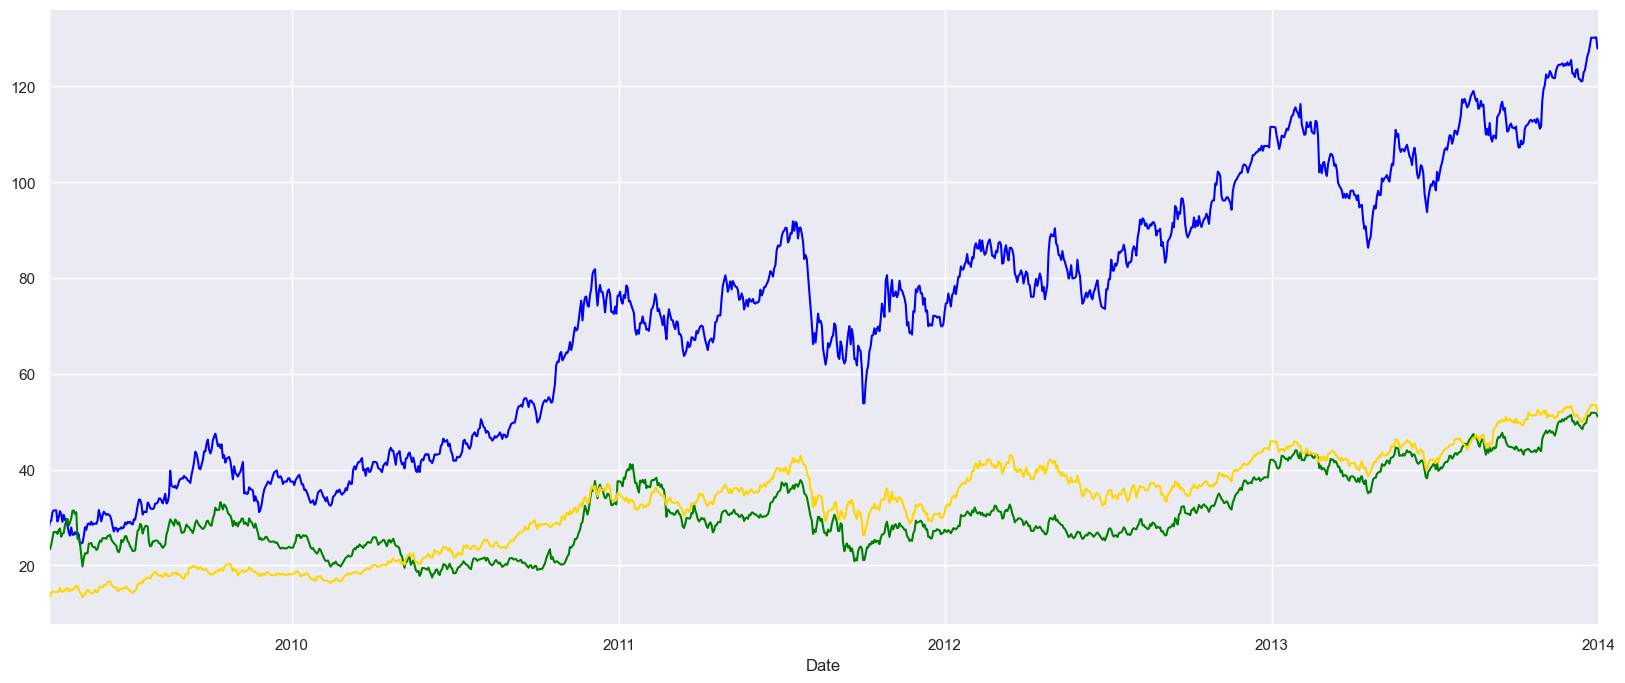

In [27]:
df['vol'][start_date:end_date].plot(figsize=(20,8),color ='blue')
df['por'][start_date:end_date].plot(color ='green')
df['bmw'][start_date:end_date].plot(color ='gold')
plt.show()

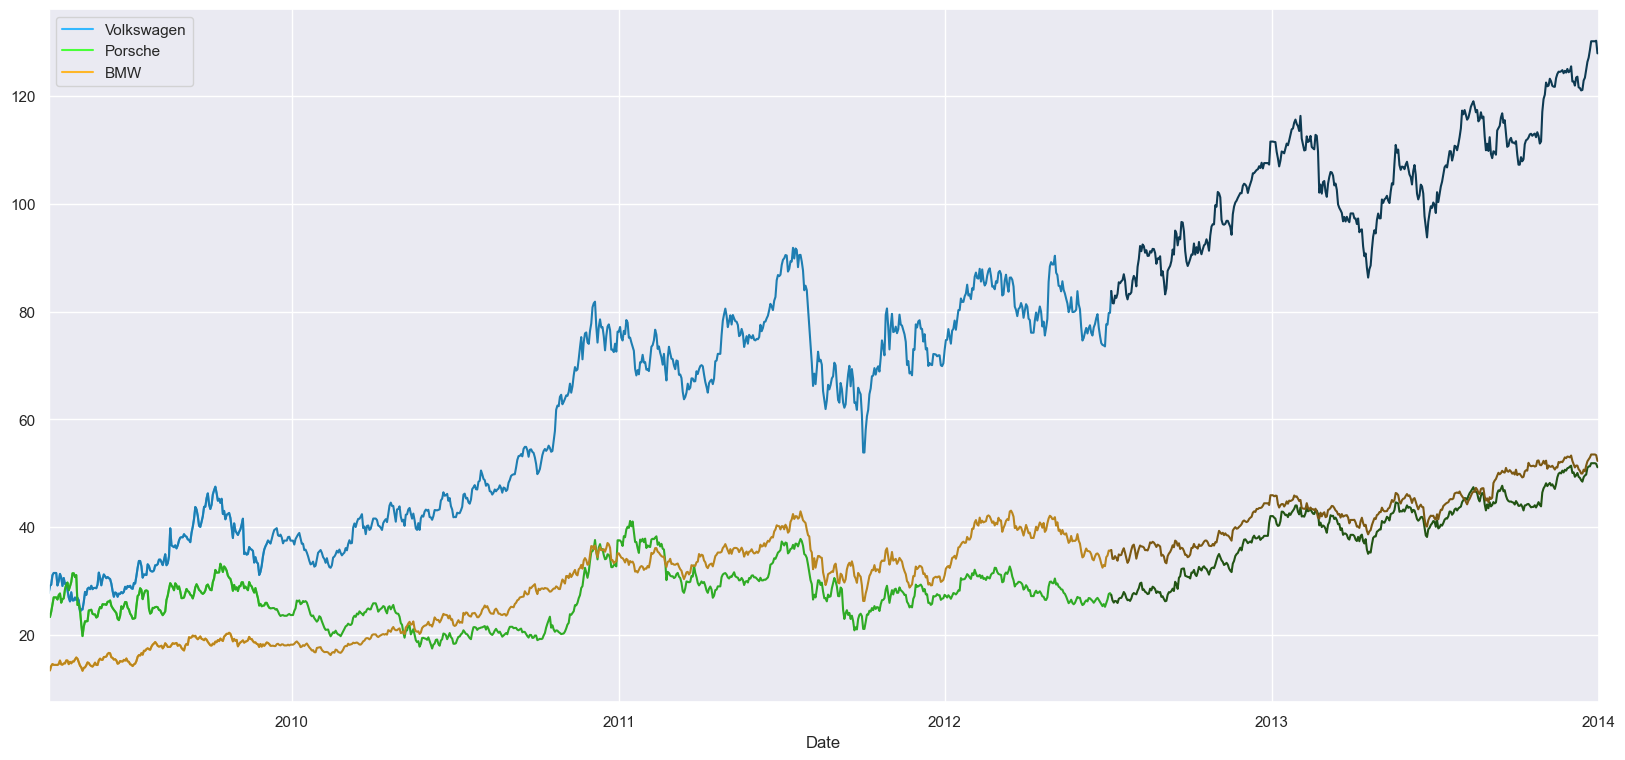

In [35]:
#color = "#33B8FF"
#color = "#49FF3A"
#color = "#FEB628"

#color = "#1E7EB2"
#color = "#2FAB25"
#color = "#BA861F"

#color = "#0E3A52"
#color = "#225414"
#color = "#7C5913"
df['vol'][start_date:ann_1].plot(figsize=(20,9),color ='#33B8FF')
df['por'][start_date:ann_1].plot(color ='#49FF3A')
df['bmw'][start_date:ann_1].plot(color ='#FEB628')

df['vol'][start_date:ann_2].plot(color ='#1E7EB2')
df['por'][start_date:ann_2].plot(color ='#2FAB25')
df['bmw'][start_date:ann_2].plot(color ='#BA861F')

df['vol'][ann_2:end_date].plot(color ='#0E3A52')
df['por'][ann_2:end_date].plot(color ='#225414')
df['bmw'][ann_2:end_date].plot(color ='#7C5913')

plt.legend(['Volkswagen','Porsche','BMW'])
plt.show()

Correlation

In [43]:
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str (end_date) + '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

Correlation among manufacturers from 2009-04-05 to 2014-01-01

Volkswagen and Porsche correlation: 	0.8359547072052246
Volkswagen and BMW correlation: 	0.9799378248982485
Porsche and BMW correlation: 		0.8052157908234895


In [44]:
print('Correlation among manufacturers from ' + str(start_date)  + ' to '  + str (ann_1)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][start_date:ann_1].corr(df['por'][start_date:ann_1])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))

Correlation among manufacturers from 2009-04-05 to 2009-12-09

Volkswagen and Porsche correlation: 	0.6633585973097443
Volkswagen and BMW correlation: 	0.8427607449754195
Porsche and BMW correlation: 		0.609504050608519


In [45]:
print('Correlation among manufacturers from ' + str(ann_1) + ' to ' + str (ann_2)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))

Correlation among manufacturers from 2009-12-09 to 2012-07-05

Volkswagen and Porsche correlation: 	0.7428267871817854
Volkswagen and BMW correlation: 	0.979594304295053
Porsche and BMW correlation: 		0.7042723437175044


In [46]:
print('Correlation among manufacturers from ' + str(ann_2) + ' to ' + str (end_date) + '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][ann_2:end_date].corr(df['por'][ann_2:end_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))

Correlation among manufacturers from 2012-07-05 to 2014-01-01

Volkswagen and Porsche correlation: 	0.9405237297554788
Volkswagen and BMW correlation: 	0.9284447226708397
Porsche and BMW correlation: 		0.9494111615233973


In [51]:
print('Correlation among manufacturers from ' + str(end_date) + ' to ' + str(df.index[-1]) + '\n')
print('Correlation Volkswagen and Porsche: \t'+ str(df['vol'][end_date:].corr(df['por'][end_date:])))
print('Correlation Volkswagen and BMW: \t'+ str(df['vol'][end_date:].corr(df['bmw'][end_date:])))
print('Correlation Porsche and BMW: \t\t'+ str(df['por'][end_date:].corr(df['bmw'][end_date:])))


Correlation among manufacturers from 2014-01-01 to 2023-11-10 00:00:00

Correlation Volkswagen and Porsche: 	0.881760497926118
Correlation Volkswagen and BMW: 	0.46626068352116223
Correlation Porsche and BMW: 		0.472610428417152


Best Fitting Models

for Volkswagen

In [53]:
mod_pr_pre_vol = auto_arima(df.vol[start_date:ann_1],exogenous =df[['por','bmw']][start_date:ann_1],
                            m =5,max_p =5,max_q =5)
mod_pr_btn_vol = auto_arima(df.vol[ann_1:ann_2],exogenous =df[['por','bmw']][ann_1:ann_2],
                            m =5,max_p =5,max_q =5)
mod_pr_post_vol = auto_arima(df.vol[ann_2:end_date],exogenous =df[['por','bmw']][ann_2:end_date],
                            m =5,max_p =5,max_q =5)


In [54]:
print(mod_pr_pre_vol.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -285.966
Date:                Sun, 12 Nov 2023   AIC                            573.932
Time:                        21:45:20   BIC                            577.108
Sample:                    04-06-2009   HQIC                           575.220
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.4820      0.082     17.983      0.000       1.320       1.643
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               232.52
Prob(Q):                              0.62   Pr

In [55]:
print(mod_pr_btn_vol.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1269.201
Date:                Sun, 12 Nov 2023   AIC                           2542.401
Time:                        21:46:40   BIC                           2551.419
Sample:                    12-09-2009   HQIC                          2545.894
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0899      0.034      2.645      0.008       0.023       0.156
sigma2         2.5731      0.103     24.998      0.000       2.371       2.775
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [56]:
print(mod_pr_post_vol.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  390
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -720.182
Date:                Sun, 12 Nov 2023   AIC                           1444.364
Time:                        21:47:26   BIC                           1452.291
Sample:                    07-05-2012   HQIC                          1447.506
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0879      0.047      1.861      0.063      -0.005       0.180
sigma2         2.3746      0.124     19.175      0.000       2.132       2.617
Ljung-Box (L1) (Q):                   0.02   Jarque-

for Porsche

In [57]:
mod_pr_pre_por = auto_arima(df.por[start_date:ann_1],exogenous =df[['vol','bmw']][start_date:ann_1],
                            m =5,max_p =5,max_q =5)
mod_pr_btn_por = auto_arima(df.por[ann_1:ann_2],exogenous =df[['vol','bmw']][ann_1:ann_2],
                            m =5,max_p =5,max_q =5)
mod_pr_post_por = auto_arima(df.por[ann_2:end_date],exogenous =df[['vol','bmw']][ann_2:end_date],
                            m =5,max_p =5,max_q =5)

In [58]:
print(mod_pr_pre_por.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -242.737
Date:                Sun, 12 Nov 2023   AIC                            487.475
Time:                        21:55:30   BIC                            490.651
Sample:                    04-06-2009   HQIC                           488.763
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.9093      0.048     19.004      0.000       0.816       1.003
Ljung-Box (L1) (Q):                   3.50   Jarque-Bera (JB):               319.80
Prob(Q):                              0.06   Pr

In [59]:
print(mod_pr_btn_por.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -774.789
Date:                Sun, 12 Nov 2023   AIC                           1553.578
Time:                        21:55:37   BIC                           1562.595
Sample:                    12-09-2009   HQIC                          1557.070
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1096      0.032      3.457      0.001       0.047       0.172
sigma2         0.5895      0.018     32.054      0.000       0.553       0.625
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [60]:
print(mod_pr_post_por.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  390
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -388.989
Date:                Sun, 12 Nov 2023   AIC                            781.977
Time:                        21:55:42   BIC                            789.905
Sample:                    07-05-2012   HQIC                           785.120
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0610      0.033      1.824      0.068      -0.005       0.127
sigma2         0.4326      0.024     17.659      0.000       0.385       0.481
Ljung-Box (L1) (Q):                   1.32   Jarque-

Predictitions for the future

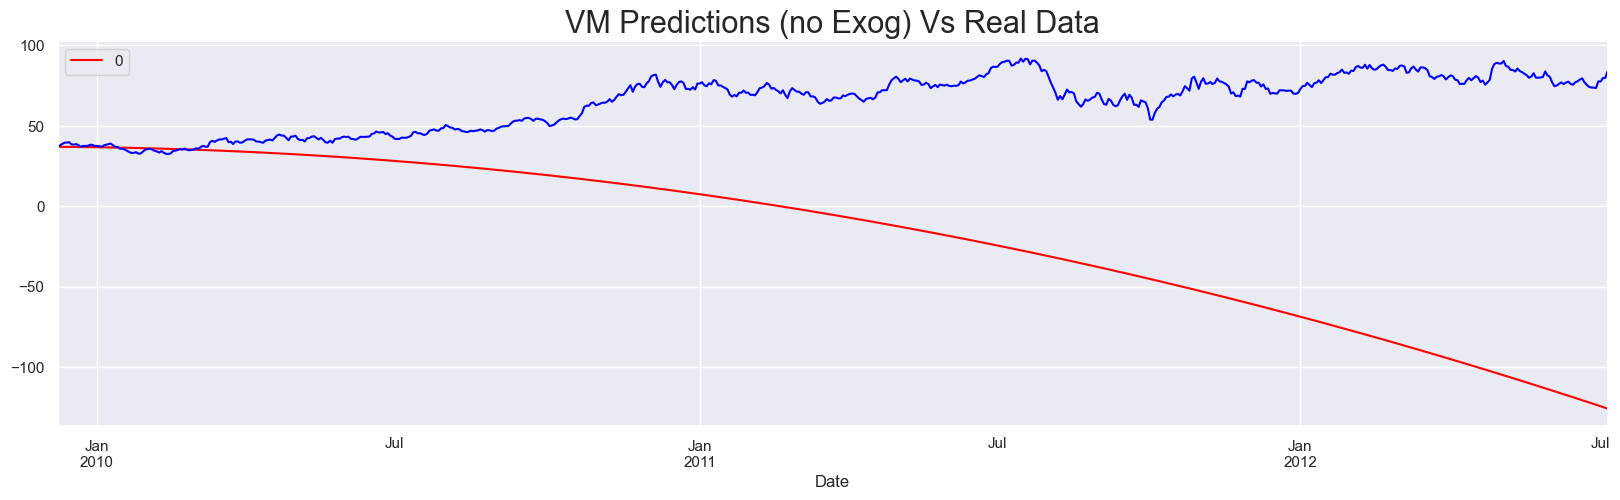

In [62]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], m=5 ,max_p=5 ,max_q=5 ,max_P=5,max_Q=5, trend= 'ct')
df_auto_pred_pr =pd.DataFrame(model_auto_pred_pr.predict(n_periods =len(df[ann_1:ann_2])),index =df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize =(20,5),color ='red')

df.vol[ann_1:ann_2].plot(color='blue')
plt.title('VM Predictions (no Exog) Vs Real Data', size = 22)
plt.show()

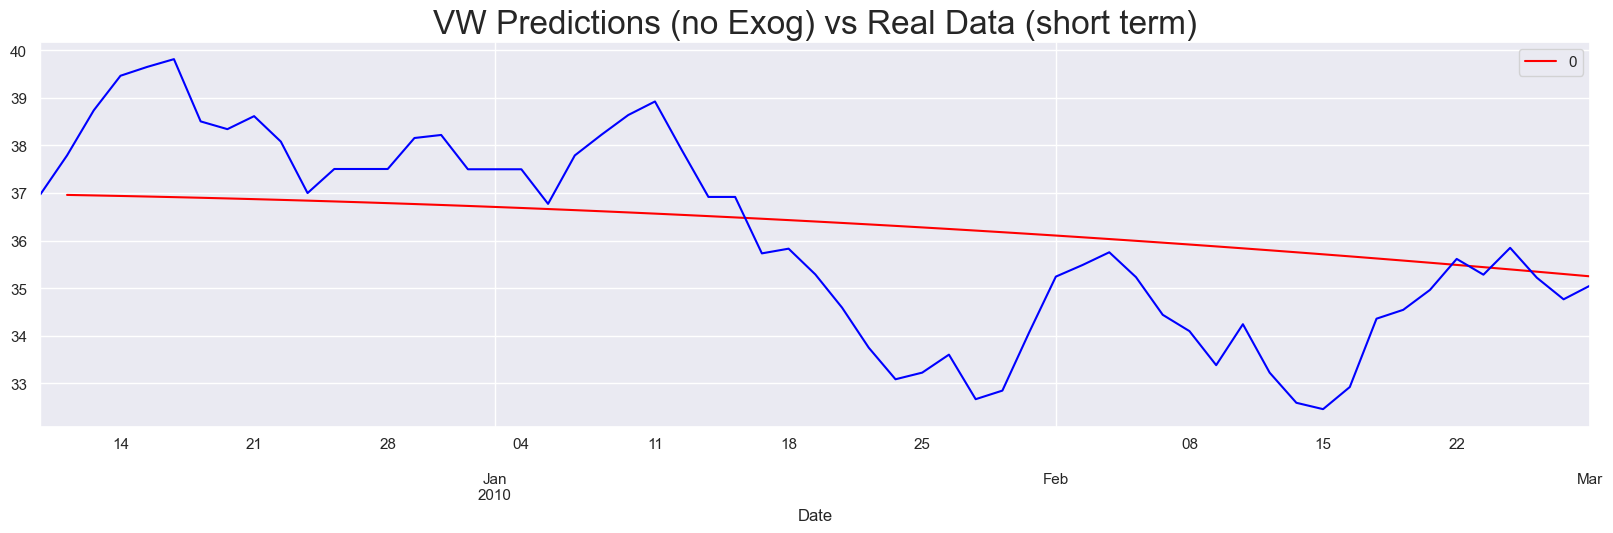

In [63]:
df_auto_pred_pr[ann_1:'2010-03-01'].plot(figsize=(20,5),color ='red')
df.vol[ann_1:'2010-03-01'].plot(color='blue')
plt.title('VW Predictions (no Exog) vs Real Data (short term)' , size =24)
plt.show()